In [7]:
%matplotlib notebook

In [8]:
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

In [9]:
# Data and labels

# [height, weight, shoe_size]
X = np.array([[181, 80, 44], 
              [177, 70, 43], 
              [160, 60, 38], 
              [154, 54, 37], 
              [166, 65, 40], 
              [190, 90, 47], 
              [175, 64, 39],
              [177, 70, 40], 
              [159, 55, 37], 
              [171, 75, 42], 
              [181, 85, 43]])

Y = np.array(['male', 
              'male', 
              'female', 
              'female', 
              'male', 
              'male', 
              'female', 
              'female', 
              'female', 
              'male', 
              'male'])

<IPython.core.display.Javascript object>


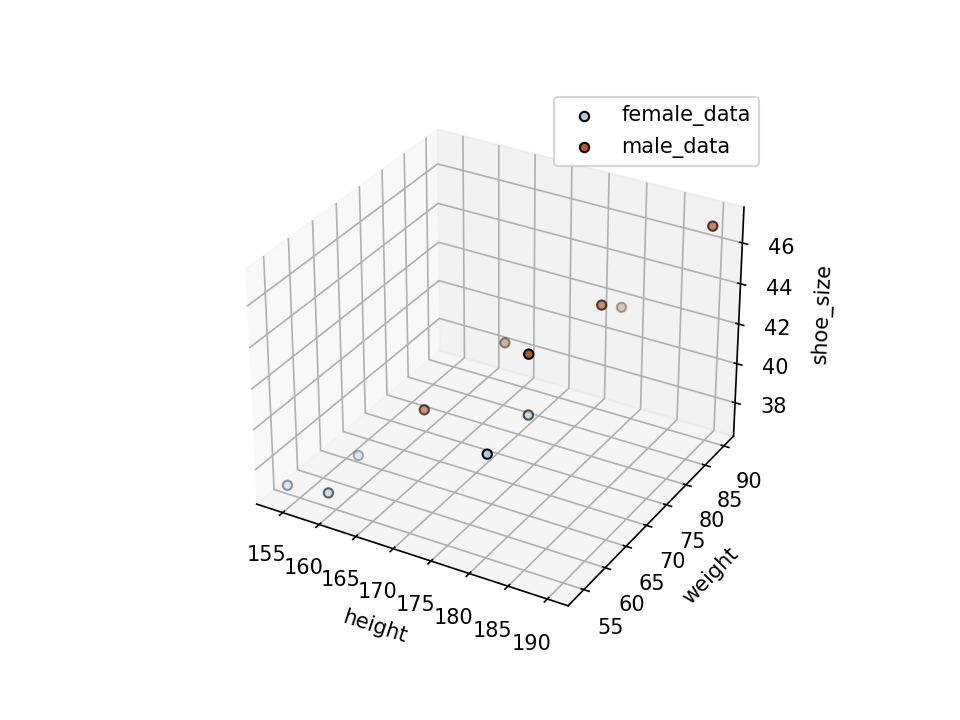

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [10]:
# visualize data

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('height')
ax.set_ylabel('weight')
ax.set_zlabel('shoe_size')

genders = np.unique(Y)
colors = [plt.cm.Paired(i/float(len(genders)-1)) 
          for i in range(len(genders))]

# plot original data points
def plot_data(ax):
    for i, gender in enumerate(genders):
        x1 = [X[j,0] for j in range(len(X)) if Y[j] == gender]
        x2 = [X[j,1] for j in range(len(X)) if Y[j] == gender]
        x3 = [X[j,2] for j in range(len(X)) if Y[j] == gender]
        ax.scatter(x1, x2, x3, c=colors[i], edgecolors='k', label=gender+'_data')

plot_data(ax)
ax.legend()

In [12]:
# Classifiers
# using the default values for all the hyperparameters
clf_tree = tree.DecisionTreeClassifier(random_state=1)
clf_svm = SVC()
clf_log = LogisticRegression()
clf_sgd = SGDClassifier()

# Normalize data for stochastic gradient descent (SGD) classifier
X_normal = X.astype(float)
for i in range(np.shape(X)[1]):
    X_normal[:,i] = (X[:,i] - X[:,i].mean()) / X[:,i].std()
    
# Train the models
clf_tree.fit(X, Y)
clf_svm.fit(X, Y)
clf_log.fit(X, Y)    
clf_sgd.fit(X_normal, Y)

# Test using the same data for simplicity
pred_tree = clf_tree.predict(X)
acc_tree = accuracy_score(Y, pred_tree) * 100
print('Accuracy for DecisionTree: {}'.format(acc_tree))

pred_svm = clf_svm.predict(X)
acc_svm = accuracy_score(Y, pred_svm) * 100
print('Accuracy for SVM: {}'.format(acc_svm))
pred_log = clf_log.predict(X)
acc_log = accuracy_score(Y, pred_log) * 100
print('Accuracy for logisticRegression: {}'.format(acc_log))

pred_sgd = clf_sgd.predict(X_normal)
acc_sgd = accuracy_score(Y, pred_sgd) * 100
print('Accuracy for SGDClassifier: {}'.format(acc_sgd))

# Report accuracies
accuracies = [acc_tree, acc_svm, acc_log, acc_sgd]
indexes = np.argwhere(accuracies == np.amax(accuracies))
classifier_names = ['DecisionTree', 
                    'SVM', 
                    'logisticRegression', 
                    'SGDClassifier']

print(f"""\nBest gender classifier(s): 
{[classifier_names[i] for i in indexes.ravel()]}""")

Accuracy for DecisionTree: 100.0
Accuracy for SVM: 54.54545454545454
Accuracy for logisticRegression: 100.0
Accuracy for SGDClassifier: 100.0

Best gender classifier(s): 
['DecisionTree', 'logisticRegression', 'SGDClassifier']


In [20]:
#visualize result of DecisionTreeClassifier, SVM, LogisticRegression
def plot_result(classifier, title=""):
    fig = plt.figure()
    
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)

    x1_min, x1_max = X[:, 0].min() - 2, X[:, 0].max() + 2
    x2_min, x2_max = X[:, 1].min() - 2, X[:, 1].max() + 2
    x3_min, x3_max = X[:, 2].min() - 2, X[:, 2].max() + 2

    xx1, xx2, xx3 = np.meshgrid(
        np.arange(x1_min, x1_max, (x1_max - x1_min)/10), 
        np.arange(x2_min, x2_max, (x2_max - x2_min)/10), 
        np.arange(x3_min, x3_max, (x3_max - x3_min)/10))

    predictions = classifier.predict(
        np.c_[xx1.ravel(), xx2.ravel(), xx3.ravel()])

    ax.set_xlabel('height')
    ax.set_ylabel('weight')
    ax.set_zlabel('shoe_size')

    genders = np.unique(Y)
    colors = [plt.cm.Paired(i/float(len(genders)-1)) 
              for i in range(len(genders))]

    # plot prediction mesh
    for i, gender in enumerate(genders):
        x1 = [xx1.ravel()[j] for j in range(len(predictions)) 
              if predictions[j] == gender]
        x2 = [xx2.ravel()[j] for j in range(len(predictions)) 
              if predictions[j] == gender]
        x3 = [xx3.ravel()[j] for j in range(len(predictions)) 
              if predictions[j] == gender]
        ax.scatter(x1, x2, x3, c=colors[i], label=gender+'_predict')

    genders = np.unique(Y)
    colors = [plt.cm.Paired(i/float(len(genders)-1)) 
              for i in range(len(genders))]

    plot_data(ax)

    ax.legend()

<IPython.core.display.Javascript object>


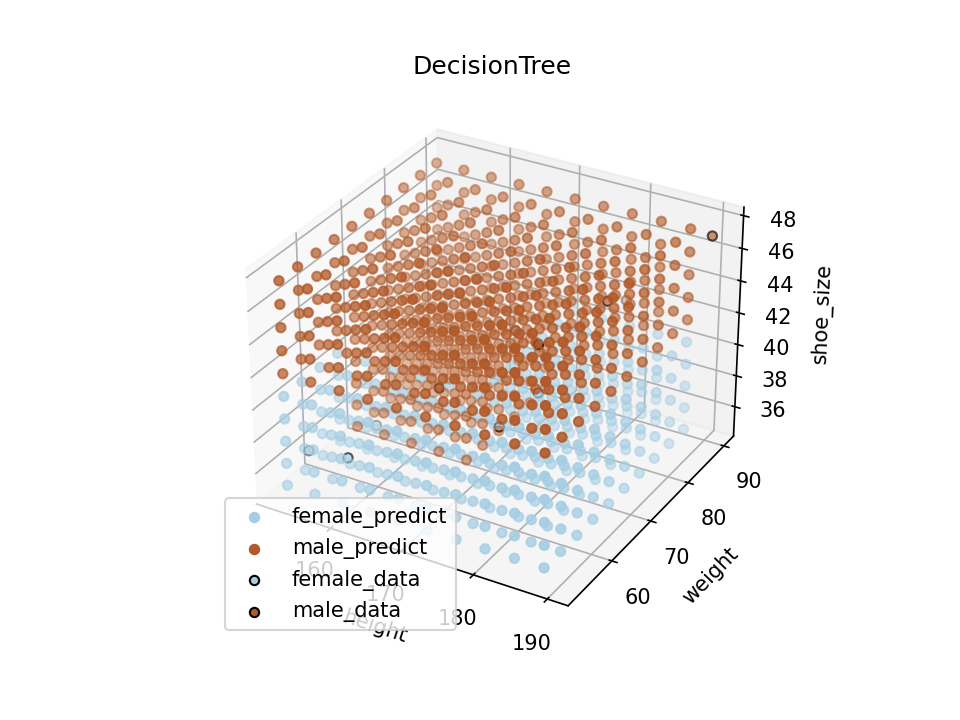

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

In [14]:
plot_result(clf_tree, title="DecisionTree")

<IPython.core.display.Javascript object>


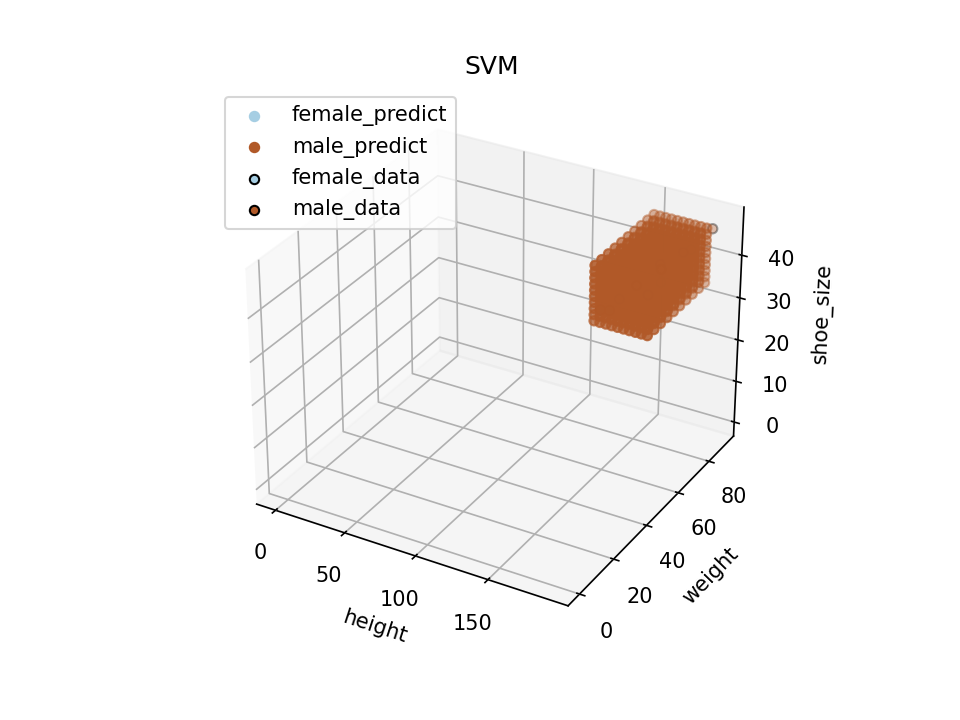

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

In [15]:
plot_result(clf_svm, title="SVM")

<IPython.core.display.Javascript object>


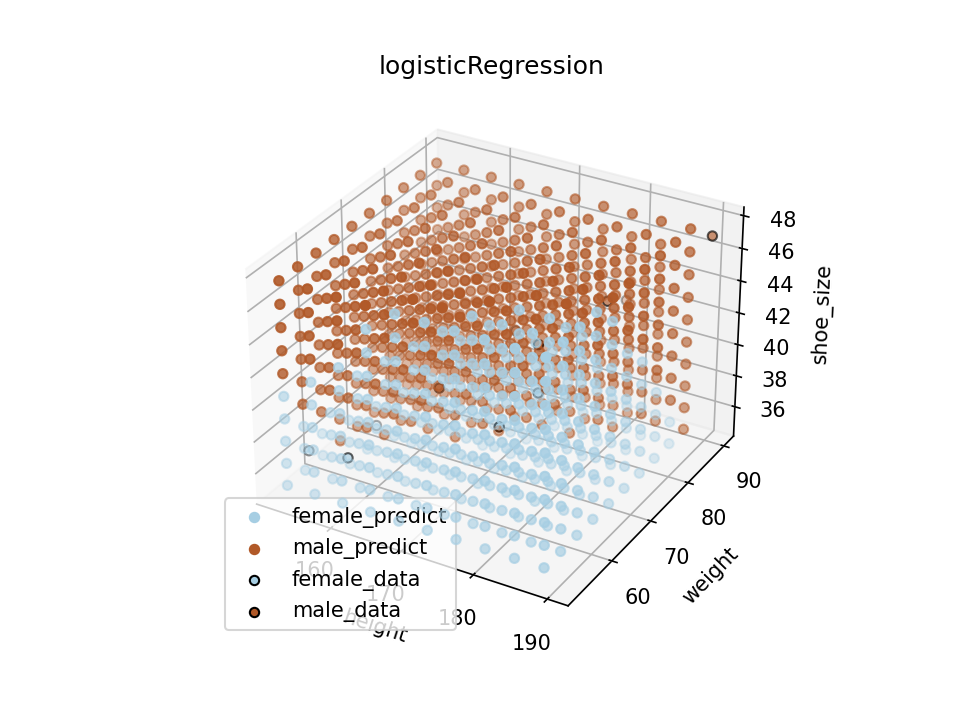

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

In [17]:
plot_result(clf_log, title="logisticRegression")

<IPython.core.display.Javascript object>


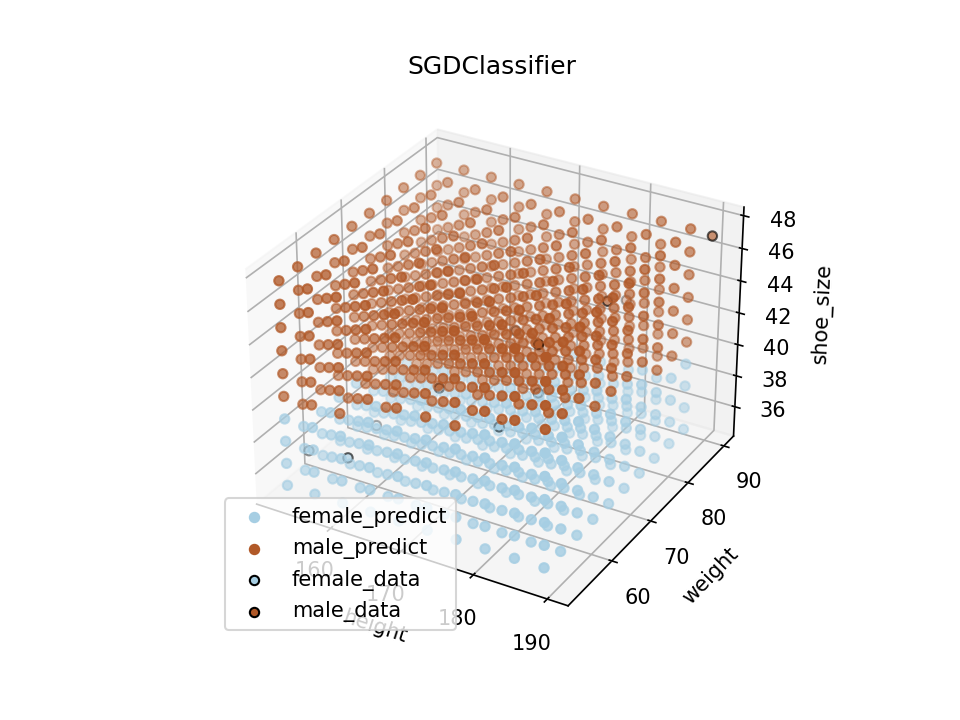

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

In [19]:
#visualize result of SGD classifier

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_title("SGDClassifier")

x1_min, x1_max = X[:, 0].min() - 2, X[:, 0].max() + 2
x2_min, x2_max = X[:, 1].min() - 2, X[:, 1].max() + 2
x3_min, x3_max = X[:, 2].min() - 2, X[:, 2].max() + 2

xx1, xx2, xx3 = np.meshgrid(
    np.arange(x1_min, x1_max, (x1_max - x1_min)/10), 
    np.arange(x2_min, x2_max, (x2_max - x2_min)/10), 
    np.arange(x3_min, x3_max, (x3_max - x3_min)/10))

# scale data for stochastic gradient descent (SGD) classifier
xx1 = xx1.astype(float)
xx2 = xx2.astype(float)
xx3 = xx3.astype(float)

xx1_scaled = (xx1 - X[:,0].mean()) / X[:,0].std()
xx2_scaled = (xx2 - X[:,1].mean()) / X[:,1].std()
xx3_scaled = (xx3 - X[:,2].mean()) / X[:,2].std()
    
predictions = clf_sgd.predict(
    np.c_[xx1_scaled.ravel(), xx2_scaled.ravel(), xx3_scaled.ravel()])

ax.set_xlabel('height')
ax.set_ylabel('weight')
ax.set_zlabel('shoe_size')

genders = np.unique(Y)
colors = [plt.cm.Paired(i/float(len(genders)-1)) 
          for i in range(len(genders))]

# plot prediction mesh
for i, gender in enumerate(genders):
    x1 = [xx1.ravel()[j] for j in range(len(predictions)) 
          if predictions[j] == gender]
    x2 = [xx2.ravel()[j] for j in range(len(predictions)) 
          if predictions[j] == gender]
    x3 = [xx3.ravel()[j] for j in range(len(predictions)) 
          if predictions[j] == gender]
    ax.scatter(x1, x2, x3, c=colors[i], label=gender+'_predict')

genders = np.unique(Y)
colors = [plt.cm.Paired(i/float(len(genders)-1)) 
          for i in range(len(genders))]

# plot original data points
plot_data(ax)
    
ax.legend()
